# Importing modules

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs

# Data Parsing

In [2]:
url = 'https://www.cbinsights.com/research-unicorn-companies'
unicorn_data = requests.get(url).text

In [3]:
unicorn_soup = bs(unicorn_data, 'html.parser')

In [4]:
unicorn_tables = unicorn_soup.find_all('table')

In [5]:
len(unicorn_tables)

1

In [7]:
unicorn_df = pd.read_html(str(unicorn_tables), flavor='bs4')[0]
unicorn_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


# Data processing and wrangling

We need to add year & continent column to enrich the exploration. First, download continent data (.csv) then parse it into pandas dataframe.

In [8]:
continent_df = pd.read_csv('continents.csv')
continent_df.head()

,Entity,Code,Year,Continent
0,Abkhazia,OWID_ABK,2015,Asia
1,Afghanistan,AFG,2015,Asia
2,Akrotiri and Dhekelia,OWID_AKD,2015,Asia
3,Albania,ALB,2015,Europe
4,Algeria,DZA,2015,Africa


In [11]:
unicorn_df['Continent'] = ""

Create a function to return clean continent name

In [116]:
def getContinent(country):
    con = str(continent_df.loc[(continent_df['Entity']==country),'Continent'].values)
    list_of_chars = ['[', ']', "''",' ']
    translation_table = str.maketrans('', '', ''.join(list_of_chars))
    con = con.translate(translation_table)
    return con

Assign the continent name values to new column in unicorn dataframe.

In [12]:
for a in unicorn_df.index:
    unicorn_df['Continent'][a] = getContinent(unicorn_df['Country'].values[a])

unicorn_df.head(15)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Asia
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",NorthAmerica
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Asia
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",NorthAmerica
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Oceania
5,Checkout.com,$40,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",Europe
6,Instacart,$39,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",NorthAmerica
7,Databricks,$38,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",NorthAmerica
8,Revolut,$33,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",Europe
9,Epic Games,$31.5,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",NorthAmerica


Add column 'year' to make it easier when exploring data.

In [46]:
year = unicorn_df['Date Joined'].str.split('/', n=2, expand=True)
year = year[2].astype('int32')
unicorn_df['Year'] = year
unicorn_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Asia,2017
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",NorthAmerica,2012
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Asia,2018
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",NorthAmerica,2014
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Oceania,2018


Delete the '$' in valuation column and convert it into float.

In [ ]:
valuation = unicorn_df['Valuation ($B)'].str.replace('$','')
valuation = valuation.astype('float')
unicorn_df['Valuation ($B)'] = valuation

Check is there any null values in the data

In [88]:
unicorn_df.isnull().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                17
Industry             0
Select Investors     1
Continent            0
Year                 0
dtype: int64

Checking null from investor column (getting the index)

In [72]:
import numpy as np
np.where(unicorn_df['Select Investors'].isnull())[0]

array([944], dtype=int64)

In [78]:
unicorn_df.loc[944]

Company                        LinkSure Network
Valuation ($B)                                1
Date Joined                            1/1/2015
Country                                   China
City                                   Shanghai
Industry            Mobile & telecommunications
Select Investors                            NaN
Continent                                  Asia
Year                                       2015
Name: 944, dtype: object

Filling the data by searching on the internet (source: https://www.cbinsights.com/company/linksure-network/financials)

In [79]:
unicorn_df.loc[944, 'Select Investors'] = 'Haitong Kaiyuan Investment, Northern Light Venture Capital'
unicorn_df.loc[944]

Company                                              LinkSure Network
Valuation ($B)                                                      1
Date Joined                                                  1/1/2015
Country                                                         China
City                                                         Shanghai
Industry                                  Mobile & telecommunications
Select Investors    Haitong Kaiyuan Investment, Northern Light Ven...
Continent                                                        Asia
Year                                                             2015
Name: 944, dtype: object

Check missing values for column with string type. To make it safe, check per column name one by one.

In [97]:
unicorn_df[unicorn_df['Continent'] == ''].index

Int64Index([816, 1045], dtype='int64')

Here, we find that there are 2 missing values in column continent (index 816 and 1045).

In [111]:
unicorn_df.loc[unicorn_df['Continent']=='']

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
816,Rohlik Group,1.2,7/1/2021,Czech Republic,Prague,"Supply chain, logistics, & delivery","Partech Partners, Index Ventures, Quadrille Ca...",,2021
1045,Augustinus Bader,1.0,11/9/2022,London,United Kingdom,Consumer & retail,General Atlantic,,2022


Found 2 rows with no continent. We get the continent value by parsing country name so we need to check on them.
1. Probably, the name for Czech Republic in continent table is different.
2. Country and city for row 1045 was reversed, human error could be the cause of this.

In [122]:
# checking country name in continent table
continent_df[continent_df['Entity'].str.contains('Czech')]

,Entity,Code,Year,Continent
64,Czechia,CZE,2015,Europe
65,Czechoslovakia,OWID_CZS,2015,Europe


Turns out, in continent table, the name for Czech Republic is Czechoslovakia. Data inconsistency often happen and luckily for this case we don't need to deal with a lot of it. However, we can learn more here https://medium.com/nerd-for-tech/data-cleaning-inconsistent-data-entry-7731ac3c52c7.

Let's revise the getContinent function to match this condition.

In [218]:
import re
def getContinent(country):
    if(country in continent_df['Entity'].values):
        con = str(continent_df.loc[(continent_df['Entity']==country),'Continent'].values)
    else:
        if len(country.split(' '))==1:
            con = str(continent_df.loc[(continent_df['Entity'].str.contains(country, flags=re.I, regex=True)),'Continent'].values[0])
        else:
            country = country.split(' ')[0]
            con = str(continent_df.loc[(continent_df['Entity'].str.contains(country, flags=re.I, regex=True)),'Continent'].values[0])
        
    list_of_chars = ['[', ']', "''",' ']
    translation_table = str.maketrans('', '', ''.join(list_of_chars))
    con = con.translate(translation_table)
    return con

Assign continent value for row 816.

In [174]:
unicorn_df.loc[816, 'Continent'] = getContinent(unicorn_df.loc[816]['Country'])
unicorn_df.loc[816]

Company                                                  Rohlik Group
Valuation ($B)                                                    1.2
Date Joined                                                  7/1/2021
Country                                                Czech Republic
City                                                           Prague
Industry                          Supply chain, logistics, & delivery
Select Investors    Partech Partners, Index Ventures, Quadrille Ca...
Continent                                                      Europe
Year                                                             2021
Name: 816, dtype: object

On column 1045, we can see that the values of its country and city are reversed, let's fix it

In [176]:
temp = unicorn_df.loc[1045, 'Country']
unicorn_df.loc[1045, 'Country'] = unicorn_df.loc[1045, 'City']
unicorn_df.loc[1045, 'City'] = temp
unicorn_df.loc[1045]

Company              Augustinus Bader
Valuation ($B)                      1
Date Joined                 11/9/2022
Country                United Kingdom
City                           London
Industry            Consumer & retail
Select Investors     General Atlantic
Continent                            
Year                             2022
Name: 1045, dtype: object

In [217]:
unicorn_df.loc[1045, 'Continent'] = getContinent(unicorn_df.loc[1045]['Country'])
unicorn_df.loc[1045]

Company              Augustinus Bader
Valuation ($B)                      1
Date Joined                 11/9/2022
Country                United Kingdom
City                           London
Industry            Consumer & retail
Select Investors     General Atlantic
Continent                      Europe
Year                             2022
Name: 1045, dtype: object

Re-checking everything before saving the data to (.csv) format

In [67]:
unicorn_df.dtypes

Company              object
Valuation ($B)      float64
Date Joined          object
Country              object
City                 object
Industry             object
Select Investors     object
Continent            object
Year                  int32
dtype: object

In [219]:
unicorn_df.head() #check it once again

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Asia,2017
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",NorthAmerica,2012
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Asia,2018
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",NorthAmerica,2014
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Oceania,2018


Python is case sensitive, we need to check whether there are any same values but using different capitalization.

In [31]:
arr_ind = unicorn_df['Industry'].unique()
list_ind = arr_ind.tolist()

In [32]:
import pprint #not really necessary but it will help to prettify the dictionary groups_words
ind_lower = {v: v.lower() for v in list_ind}

my_list = []
groups_words = {}
for key, value in ind_lower.items():
    if value in groups_words.keys():
        my_list = groups_words[value]
        my_list.append(key)
        groups_words[value] = my_list
    else:
        groups_words[value] = [key]

pprint.pprint(groups_words)

{'artificial intelligence': ['Artificial Intelligence',
                             'Artificial intelligence'],
 'auto & transportation': ['Auto & transportation'],
 'consumer & retail': ['Consumer & retail'],
 'cybersecurity': ['Cybersecurity'],
 'data management & analytics': ['Data management & analytics'],
 'e-commerce & direct-to-consumer': ['E-commerce & direct-to-consumer'],
 'edtech': ['Edtech'],
 'fintech': ['Fintech'],
 'hardware': ['Hardware'],
 'health': ['Health'],
 'internet software & services': ['Internet software & services'],
 'mobile & telecommunications': ['Mobile & telecommunications'],
 'other': ['Other'],
 'supply chain, logistics, & delivery': ['Supply chain, logistics, & delivery'],
 'travel': ['Travel']}


Actually, we can just use .unique() to get each unique values from the column, however, when we have a lot of data, it would be very difficult to identify which one has the same actual values, hence, I create this function to show which data is not standard. The dictionary contains lower case industry name as the key and data with original case as the values. 

Each key should have 1 value, however we can see that AI industry has 2 values: Artificial intelligence and Artificial Intelligence (different capslock), we need to standardize them to avoid ambiguity when exploring & presenting the data.

In [33]:
unicorn_df[unicorn_df['Industry']=='Artificial intelligence'].count()

Company             4
Valuation ($B)      4
Date Joined         4
Country             4
City                4
Industry            4
Select Investors    4
Continent           4
Year                4
dtype: int64

In [34]:
unicorn_df['Industry'].loc[unicorn_df['Industry']=='Artificial intelligence'] = 'Artificial Intelligence'

In [35]:
unicorn_df[unicorn_df['Industry']=='Artificial intelligence'].count()

Company             0
Valuation ($B)      0
Date Joined         0
Country             0
City                0
Industry            0
Select Investors    0
Continent           0
Year                0
dtype: int64

Drop duplicates

In [4]:
unicorn_df.drop_duplicates()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Asia,2017
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",NorthAmerica,2012
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Asia,2018
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",NorthAmerica,2014
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Oceania,2018
...,...,...,...,...,...,...,...,...,...
1199,LeadSquared,1.0,6/21/2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West...",Asia,2022
1200,FourKites,1.0,6/21/2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu...",NorthAmerica,2022
1201,VulcanForms,1.0,7/5/2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr...",NorthAmerica,2022
1202,SingleStore,1.0,7/12/2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective",NorthAmerica,2022


Save the data into (.csv) format.

In [163]:
unicorn_df.to_csv('unicorn_dataset_fix.csv', index=False)

# Begin the exploration

## Filtering Data with Specific Conditions

### 1. Display unicorn data from Asia with Artificial Intelligence industry then sort by their valuation

In [339]:
ai_asia_data = unicorn_df[(unicorn_df['Continent'] == 'Asia') & (unicorn_df['Industry'] == 'Artificial Intelligence')].sort_values(by='Valuation ($B)', ascending=False)
ai_asia_data

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
0,ByteDance,140.00,4/7/2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Asia,2017
139,Horizon Robotics,5.00,2/27/2019,China,Beijing,Artificial Intelligence,"Hillhouse Capital Management, Linear Venture, ...",Asia,2019
192,MEGVII,4.00,10/31/2017,China,Beijing,Artificial Intelligence,"Ant Financial Services Group, Russia-China Inv...",Asia,2017
421,Hesai Tech,2.18,8/1/2020,China,Shanghai,Artificial Intelligence,"Lightspeed China Partners, Baidu Ventures, Qim...",Asia,2020
422,YITU Technology,2.17,3/8/2018,China,Shanghai,Artificial Intelligence,"Sequoia Capital China, Banyan Capital",Asia,2018
450,Preferred Networks,2.00,5/17/2018,Japan,Tokyo,Artificial Intelligence,"Toyota Motor Corporation, Mizuho Financial Gro...",Asia,2018
452,4Paradigm,2.00,12/19/2018,China,Beijing,Artificial Intelligence,"Sequoia Capital China, China Construction Bank...",Asia,2018
481,XtalPi,2.00,8/11/2021,China,Shenzhen,Artificial Intelligence,"Tencent Holdings, 5Y Capital, Sequoia Capital ...",Asia,2021
489,Black Sesame Technologies,2.00,9/22/2021,China,Shanghai,Artificial Intelligence,"Northern Light Venture Capital, Xiaomi, Future...",Asia,2021
490,Advance Intelligence Group,2.00,9/23/2021,Singapore,NaN,Artificial Intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund",Asia,2021


### 2. Display unicorn data with investors containing 'capital' word and from fintech industry

In [89]:
fintech_capital = unicorn_df[(unicorn_df['Select Investors'].str.contains('capital', flags=re.I, na=False, regex=True)) & (unicorn_df['Industry']=='Fintech')]
fintech_capital

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",NorthAmerica,2014
8,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",Europe,2018
11,Chime,25.0,3/5/2019,United States,San Francisco,Fintech,"Forerunner Ventures, Crosslink Capital, Homebrew",NorthAmerica,2019
21,Ripple,15.0,12/20/2019,United States,San Francisco,Fintech,"IDG Capital, Venture51, Lightspeed Venture Par...",NorthAmerica,2019
23,Plaid,13.5,12/11/2018,United States,San Francisco,Fintech,"New Enterprise Associates, Spar Capital, Index...",NorthAmerica,2018
...,...,...,...,...,...,...,...,...,...
1171,Gauntlet Networks,1.0,3/7/2022,United States,New York,Fintech,"Polychain Capital, Paradigm, Ribbit Capital",NorthAmerica,2022
1173,Glia,1.0,3/21/2022,United States,New York,Fintech,"Wildcat Capital Management, Insight Partners, ...",NorthAmerica,2022
1183,Oyster,1.0,4/20/2022,United States,Wilmington,Fintech,"Emergence Capital, Slack Fund, PayPal Ventures",NorthAmerica,2022
1189,Open,1.0,5/2/2022,India,Bengaluru,Fintech,"3one4 Capital Partners, Tiger Global Managemen...",Asia,2022


### 3. Display 5 countries with highest number of unicorn

In [345]:
unicorn_df.groupby('Country').count()['Company'].sort_values(ascending=False).head()

Country
United States     651
China             172
India              70
United Kingdom     50
Germany            29
Name: Company, dtype: int64

### 4. Display the industry that has most company number from each continent.

In [11]:
grouped_df = unicorn_df.groupby(['Continent','Industry']).count()
result = grouped_df.loc[grouped_df.groupby('Continent')['Company'].idxmax()]
result['Company']

Continent     Industry                       
Africa        Fintech                              3
Asia          E-commerce & direct-to-consumer     57
Europe        Fintech                             53
NorthAmerica  Internet software & services       168
Oceania       Internet software & services         5
SouthAmerica  Fintech                              9
Name: Company, dtype: int64

### 5. Display the company name and country with highest valuation in 2019.

In [76]:
filtered_df = unicorn_df[unicorn_df['Year']==2019]
filtered_df = filtered_df.sort_values(by='Valuation ($B)',ascending=False)
filtered_df[['Company','Country','Valuation ($B)']].head(1)

,Company,Country,Valuation ($B)
5,Checkout.com,United Kingdom,40.0


### 6. Display company with highest valuation from each country.

In [88]:
unicorn_df.loc[unicorn_df.groupby(['Country'])['Valuation ($B)'].idxmax()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
377,Uala,2.45,8/13/2021,Argentina,Buenos Aires,Fintech,"Soros Fund Management, Ribbit Capital, Monashees+",SouthAmerica,2021
4,Canva,40.00,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Oceania,2018
187,BitPanda,4.11,3/16/2021,Austria,Vienna,Fintech,"Speedinvest, Valar Ventures, Uniqa Ventures",Europe,2021
131,Collibra,5.25,1/29/2019,Belgium,Brussels,Data management & analytics,"Index Ventures, Battery Ventures, ICONIQ Capital",Europe,2019
579,Afiniti,1.60,4/14/2017,Bermuda,Hamilton,Artificial Intelligence,GAM Holding,NorthAmerica,2017
133,QuintoAndar,5.10,9/9/2019,Brazil,Campinas,E-commerce & direct-to-consumer,"Kaszek Ventures, General Atlantic, SoftBank Group",SouthAmerica,2019
82,Dapper Labs,7.60,3/30/2021,Canada,Vancouver,Internet software & services,"Union Square Ventures, Venrock, Andreessen Hor...",NorthAmerica,2021
644,NotCo,1.50,7/26/2021,Chile,Santiago,Consumer & retail,"Kaszek Ventures, SOSV, Tiger Global Management",SouthAmerica,2021
0,ByteDance,140.00,4/7/2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Asia,2017
130,Rappi,5.25,8/31/2018,Colombia,Bogota,"Supply chain, logistics, & delivery","DST Global, Andreessen Horowitz, Sequoia Capit...",SouthAmerica,2018


### 7. Display the first companies that joined from each continent.

We need to convert date joined column into datetime type first.

In [96]:
unicorn_df['Date Joined']= pd.to_datetime(unicorn_df['Date Joined'])
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1204 entries, 0 to 1203
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1204 non-null   object        
 1   Valuation ($B)    1204 non-null   float64       
 2   Date Joined       1204 non-null   datetime64[ns]
 3   Country           1204 non-null   object        
 4   City              1187 non-null   object        
 5   Industry          1204 non-null   object        
 6   Select Investors  1203 non-null   object        
 7   Continent         1204 non-null   object        
 8   Year              1204 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 134.1+ KB


In [99]:
unicorn_df.loc[unicorn_df.groupby(['Continent'])['Date Joined'].idxmin()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
602,Promasidor Holdings,1.59,2016-11-08,South Africa,Bryanston,Consumer & retail,"IFC, Ajinomoto",Africa,2016
440,Trendy Group International,2.00,2012-02-13,Hong Kong,Kowloon,Consumer & retail,L Capital Partners,Asia,2012
727,Veepee,1.38,2007-07-02,France,La Plaine Saint-Denis,E-commerce & direct-to-consumer,"Summit Partners, Qatar Holding",Europe,2007
120,Vice Media,5.70,2011-04-02,United States,Brooklyn,Internet software & services,"Technology Crossover Ventures, A&E Television ...",NorthAmerica,2011
4,Canva,40.00,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Oceania,2018
852,LifeMiles,1.15,2015-07-13,Colombia,Bogota,Other,Advent International,SouthAmerica,2015


### 8. Display the last 5 country from Europe that joined in unicorn data.

In [100]:
filtered_df = unicorn_df[unicorn_df['Continent']=='Europe']
filtered_df = filtered_df.sort_values(by='Date Joined',ascending=False)
filtered_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
926,Beamery,1.00,2022-12-13,United Kingdom,London,Artificial Intelligence,"Index Ventures, EQT Ventures, Workday Ventures",Europe,2022
850,Younited,1.16,2022-12-08,France,Paris,Fintech,"Weber Investissements, Schibsted Growth",Europe,2022
439,BeZero,2.00,2022-11-14,United Kingdom,London,Other,"Molten Ventures, Contrarian Ventures, Hitachi ...",Europe,2022
1045,Augustinus Bader,1.00,2022-11-09,United Kingdom,London,Consumer & retail,General Atlantic,Europe,2022
930,Celestia,1.00,2022-10-19,Liechtenstein,Vaduz,Internet software & services,"Placeholder Capital, Coinbase Ventures, Binanc...",Europe,2022


### 9. Display investors and how many unicorn they've funded.

If we are using existing data from the column investors, we can't easily explore things because one company can have more than one investors so we need to split them into separated list.

In [11]:
#separating all investors and inputing into one list
list_investor = []
for i,a in unicorn_df.iterrows():
    row = unicorn_df['Select Investors'][i].split(',')
    len_row = len(row)
    for index in range(len_row):
        temp = row[index].strip()
        list_investor.append(temp)
len(list_investor)

3414

In [12]:
#getting unique investors (no redundant data)
unique_investor = []
for i,a in unicorn_df.iterrows():
    row = unicorn_df['Select Investors'][i].split(',')
    len_row = len(row)
    for index in range(len_row):
        temp = row[index].strip()
        if temp not in unique_investor: #adding this condition to filter unique values
            unique_investor.append(temp)
len(unique_investor)

1383

Turns out, we only have 1383 unique investors (out of 3414), that means, each investor could fund more than one companies. Let's dig deep into this!

In [15]:
#counting the number of companies each investor has funded and putting them into pandas dataframe
inv_dic = {}
for i in unique_investor:
    inv_dic[i] = list_investor.count(i)

investor_df = pd.DataFrame(list(inv_dic.items()),columns = ['Investor Name','Number of Company'])

In [16]:
investor_df

,Investor Name,Number of Company
0,Sequoia Capital China,48
1,SIG Asia Investments,3
2,Sina Weibo,2
3,Softbank Group,8
4,Founders Fund,19
...,...,...
1378,Stakeboat Capital,1
1379,Hyde Park Angels,1
1380,Boost VC,1
1381,Draper Associates,1


We can also explore things like top 10 investors with most companies.

In [17]:
investor_df.sort_values(by='Number of Company', ascending=False).head(10)

,Investor Name,Number of Company
38,Accel,64
18,Andreessen Horowitz,61
14,Insight Partners,56
7,Tiger Global Management,56
44,Sequoia Capital,52
0,Sequoia Capital China,48
59,General Catalyst,43
51,Lightspeed Venture Partners,41
26,SoftBank Group,35
55,Index Ventures,33


Or, we can display investors that only funded one company.

In [20]:
investor_df[investor_df['Number of Company']==1]

,Investor Name,Number of Company
5,Draper Fisher Jurvetson,1
6,Rothenberg Ventures,1
10,LowercaseCapital,1
17,Collaborative Fund,1
21,index Ventures,1
...,...,...
1378,Stakeboat Capital,1
1379,Hyde Park Angels,1
1380,Boost VC,1
1381,Draper Associates,1


Save this investor data to csv file.

In [19]:
investor_df.to_csv('investor_data.csv',index=False)

## Data Visualization

### 1. Total unicorn per continent

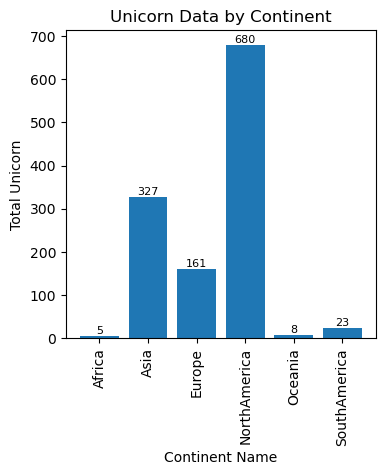

In [19]:
import matplotlib.pyplot as plt

continent = [con for con, df in unicorn_df.groupby('Continent')]
grouped_qty = unicorn_df.groupby('Continent').count()['Company']

fig, ax = plt.subplots(figsize=(4,4))
plt.bar(continent, grouped_qty)    
plt.xlabel("Continent Name")
plt.ylabel("Total Unicorn")
plt.xticks(continent, rotation = "vertical")
plt.title('Unicorn Data by Continent')
for index in range(len(continent)):
  ax.text(index, grouped_qty[index], grouped_qty[index], size=8, ha='center', va='bottom')
plt.show()

### 2. Unicorn number growth per year according to continent

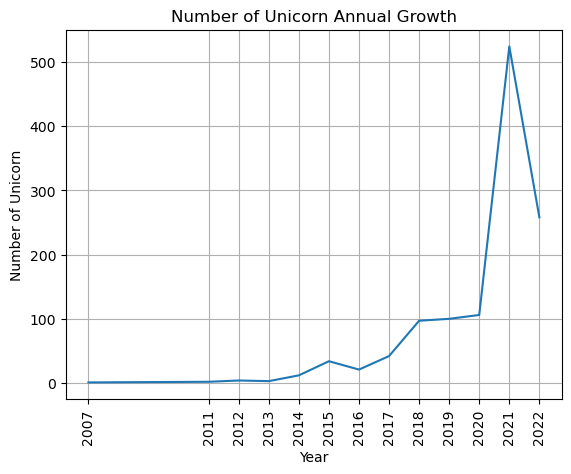

In [114]:
#grouped_year = unicorn_df[unicorn_df['Continent']=='Asia'].groupby('Year')
grouped_year = unicorn_df.groupby('Year')
result_year = grouped_year['Year'].count()
years = [yr for yr, df in grouped_year]

plt.plot(years, result_year)
plt.xticks(years, rotation = "vertical")
plt.title('Number of Unicorn Annual Growth')
plt.xlabel('Year')
plt.ylabel('Number of Unicorn')
plt.grid()
plt.show()

In [118]:
filtered_df = unicorn_df[(unicorn_df['Year']==2021)]
filtered_df.groupby('Industry').count()['Company'].sort_values(ascending=False)

Industry
Fintech                                132
Internet software & services           121
Health                                  43
E-commerce & direct-to-consumer         41
Artificial Intelligence                 36
Supply chain, logistics, & delivery     29
Cybersecurity                           27
Data management & analytics             23
Other                                   20
Hardware                                15
Edtech                                  13
Consumer & retail                       10
Mobile & telecommunications              6
Auto & transportation                    5
Travel                                   3
Name: Company, dtype: int64

In [117]:
filtered_df = unicorn_df[(unicorn_df['Year']==2020)]
filtered_df.groupby('Industry').count()['Company'].sort_values(ascending=False)

Industry
Internet software & services           18
Fintech                                15
E-commerce & direct-to-consumer        14
Health                                 12
Other                                  10
Mobile & telecommunications             8
Cybersecurity                           7
Data management & analytics             5
Auto & transportation                   5
Edtech                                  4
Supply chain, logistics, & delivery     3
Artificial Intelligence                 3
Hardware                                1
Consumer & retail                       1
Name: Company, dtype: int64

After seeing the chart, we notice that there's a huge spike in year 2020 until 2021. When we look deeper, we found that the highest growth is from fintech industry. As we know, 2020 was the start of COVID-19 pandemic, how come this industry could grow bigger than any other industries?

There are some factors to consider:
1. Hygiene. People are reluctant to use cash since the likelihood of transfering the virus is quite high. Hence, they prefer to use digital payment and e-wallets.
2. Many people are affected economically by this pandemic and digital lending could help providing capital assistance to this economically vulnerable populations.

Source : https://www.financierworldwide.com/role-of-fintech-in-the-post-covid-19-world, https://www.weforum.org/agenda/2022/06/agility-resilience-and-impact-how-fintech-charted-a-positive-course-through-the-global-pandemic/

Disclaimer: this unicorn data is based on the website https://www.cbinsights.com/research-unicorn-companies and used for exploration purpose only.